<a href="https://colab.research.google.com/github/unihong/MS-AI-School/blob/main/20230509_DL_Keras_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
keras.__version__

'2.12.0'

In [ ]:
from keras.datasets import mnist
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

In [ ]:
train_images.shape           #60000장 데이터, 28픽셀

(60000, 28, 28)

In [ ]:
train_labels.shape #총 60000건

(60000,)

In [ ]:
test_images.shape

(10000, 28, 28)

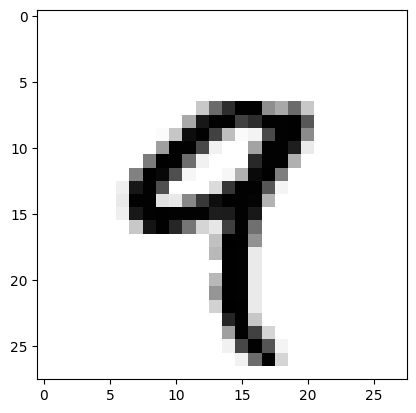

In [ ]:
#데이터의 확인
import matplotlib.pyplot as plt

digit = train_images[4]   #2차원 데이터 : []꺽쇠가 2개 열림.
plt.imshow(digit, cmap=plt.cm.binary)   #제일 진한 곳은 1

In [ ]:
##간단한 신경망만들기
from keras import models
from keras import layers

network = models.Sequential()  ## 순차적으로 레이어를 쌓아나가겠다. 
##정보량: 28*28=784 이 너무 많은 것 같아서 조금 줄이기
network.add(layers.Dense(512,activation='relu',input_shape=(28*28,)))  #일반적인 activation
network.add(layers.Dense(10,activation='softmax'))
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
#데이터를 준비하는 부분

train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255


test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') /255

In [ ]:
#라벨 데이터를 카테고리 데이터로 변환
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
train_labels = to_categorical(test_labels)

In [ ]:
# 신경망의 학습
network.fit(train_images, train_labels, epochs=5, batch_size=128)

ValueError: ignored

In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test acc:', test_acc)

ValueError: ignored

In [ ]:
# IMDB 

from keras.datasets import imdb
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000)    #num_words : 빈도가 높은 데이터를 가져온다. 

In [ ]:
train_data.shape

(25000,)

In [ ]:
train_labels[0:5]     #긍정 : 1, 부정 : 0

array([1, 0, 0, 1, 0])

In [ ]:
max([max(sequence) for sequence in train_data])


9999

In [ ]:
# 데이터를 준비
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  result = np.zeros((len(sequences),dimension))

  print(result.shape)

  for i, sequence in enumerate(sequences):
    result[i, sequence] = 1
  return result

In [ ]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

(25000, 10000)
(25000, 10000)


In [ ]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
# 라벨 데이터도 실수형으로 
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
y_train[0]

1.0

In [ ]:
# 신경망 제작
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation= 'relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
history = model.fit(partial_x_train, 
          partial_y_train,
          epochs=20,
          batch_size=512,
          validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 99ms/step - loss: 0.0143 - accuracy: 0.9969 - val_loss: 0.6015 - val_accuracy: 0.8692
Epoch 2/20
30/30 [==============================] - 2s 65ms/step - loss: 0.0064 - accuracy: 0.9999 - val_loss: 0.6215 - val_accuracy: 0.8687
Epoch 3/20
30/30 [==============================] - 1s 45ms/step - loss: 0.0101 - accuracy: 0.9982 - val_loss: 0.6426 - val_accuracy: 0.8681
Epoch 4/20
30/30 [==============================] - 1s 40ms/step - loss: 0.0046 - accuracy: 0.9999 - val_loss: 0.7878 - val_accuracy: 0.8503
Epoch 5/20
30/30 [==============================] - 1s 40ms/step - loss: 0.0077 - accuracy: 0.9983 - val_loss: 0.7000 - val_accuracy: 0.8626
Epoch 6/20
30/30 [==============================] - 1s 38ms/step - loss: 0.0072 - accuracy: 0.9987 - val_loss: 0.7008 - val_accuracy: 0.8669
Epoch 7/20
30/30 [==============================] - 1s 38ms/step - loss: 0.0028 - accuracy: 0.9999 - val_loss: 0.7244 - val_accuracy: 0.8659
Epoch 8/20
30

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

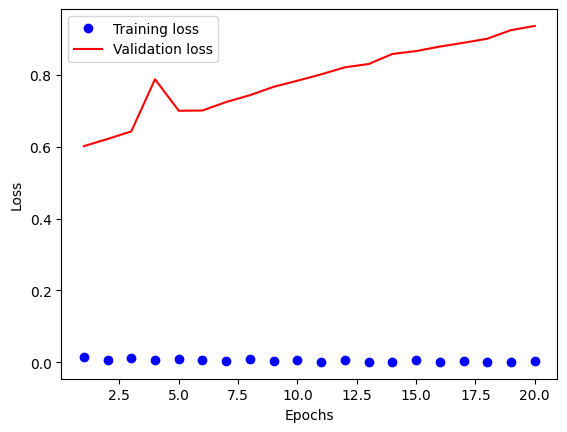

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']


epochs = range(1,len(acc)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r-', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [ ]:
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_loss, 'r-', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
model.predict(x_test)

782/782 [==============================] - 2s 2ms/step


array([[8.6138438e-04],
       [1.0000000e+00],
       [3.3566311e-01],
       ...,
       [3.5419525e-05],
       [1.7469435e-04],
       [9.8981678e-01]], dtype=float32)

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('loss={0}, accuracy={1}'.format(test_loss, test_acc))